In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# These files from an .xlsv fromr Jin-Si on March 31.
# I save the sheets as csv files and removed the first of two header rows
area_csv = 'D:/crs/proj/2023_NCB_recovery/NCB_Pond_Recovery_10_area.csv'
perim_csv = 'D:/crs/proj/2023_NCB_recovery/NCB_Pond_Recovery_10_perim.csv'

In [2]:
# Aerial survey dates
dates =['2019-09-13',
         '2019-10-11', 
         '2019-11-26',
         '2020-02-08', 
         '2020-05-08', 
         '2020-08-02', 
         '2020-08-05', 
         '2020-09-28', 
         '2021-04-30', 
         '2021-06-15', 
         '2021-09-20', 
         '2022-10-19']
dt = pd.to_datetime(dates)

In [3]:
# read in the area file, extract data for main ponds (no sub pond)
dfa = pd.read_csv(area_csv)
area = dfa[dfa['Sub Pond'].isna()].iloc[:,8:].values
print(np.shape(area))

(10, 12)


In [4]:
# read in the perimeter file, extract data for main ponds (no sub pond)
dfp = pd.read_csv(perim_csv)
perim = dfp[dfp['Sub Pond'].isna()].iloc[:,8:].values
print(np.shape(perim))

(10, 12)


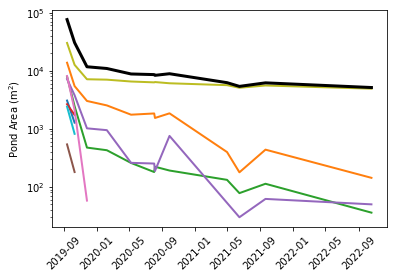

In [5]:
for i in range(10):
    plt.plot(dt, area[i,:],linewidth=2)
plt.plot(dt, np.nansum(area,0),'-k',linewidth=3)
plt.ylabel(r'Pond Area (m$^2$)')
plt.yscale('log')
_ = plt.xticks(rotation=45)

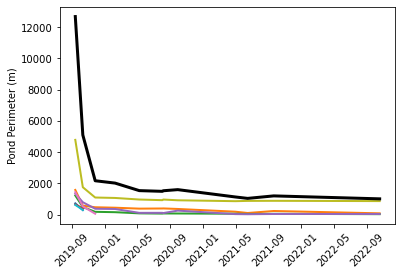

In [6]:
for i in range(10):
    plt.plot(dt,perim[i,:],linewidth=2)
plt.plot(dt, np.nansum(perim,0),'-k',linewidth=3)
plt.ylabel(r'Pond Perimeter (m)')
_ = plt.xticks(rotation=45)

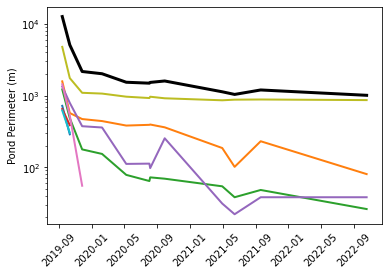

In [7]:
for i in range(10):
    plt.plot(dt, perim[i,:],linewidth=2)
plt.plot(dt, np.nansum(perim,0),'-k',linewidth=3)
plt.ylabel(r'Pond Perimeter (m)')
plt.yscale('log')
_ = plt.xticks(rotation=45)

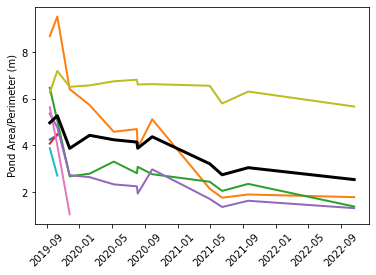

In [8]:
for i in range(10):
    plt.plot(dt,area[i,:]/perim[i,:],linewidth=2)
plt.plot(dt, np.nanmean(area/perim,0),'-k',linewidth=3)
plt.ylabel(r'Pond Area/Perimeter (m)')
_ = plt.xticks(rotation=45)

In [9]:
# long-winded way of changing dt to decimal years
# https://stackoverflow.com/questions/6451655/how-to-convert-python-datetime-dates-to-decimal-float-years

from datetime import datetime as datetime
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = datetime(year=year, month=1, day=1)
    startOfNextYear = datetime(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

yr = np.ones(len(dt))
for i, val in enumerate(dt):
    yr[i]=toYearFraction(val)
yr    

array([2019.69851598, 2019.77522831, 2019.90136986, 2020.10382514,
       2020.34961293, 2020.58458561, 2020.59278233, 2020.74032332,
       2021.32591324, 2021.45194064, 2021.71769406, 2022.79714612])

[-1.13511554e+00  2.30325683e+03]
2.154107960254782


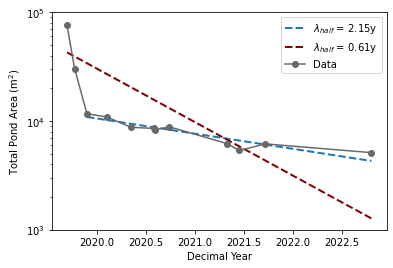

In [10]:
# fit area = log(Area) = a+bt
areat = np.nansum(area,0)
m = np.polyfit( yr, np.log(areat), 1, w=np.sqrt(areat))
print(m)
amod = np.exp(m[1]+m[0]*yr)
m_half = np.log(0.5)/m[0]
ts = (r'$\lambda_{half}$ = ' + '{:.2f}y'.format(m_half) )
# omit first two datapoints
m2 = np.polyfit( yr[2:], np.log(areat[2:]), 1, w=np.sqrt(areat[2:]))
amod2 = np.exp(m2[1]+m2[0]*yr[2:])
m2_half = np.log(0.5)/m2[0]
ts2 = (r'$\lambda_{half}$ = ' + '{:.2f}y'.format(m2_half) )
print(np.log(0.5)/m2[0])
plt.plot(yr[2:], amod2, '--', linewidth=2, label=ts2)

plt.plot(yr, amod, '--', linewidth=2, c= 'maroon', label=ts)
plt.plot(yr, areat, '-o', label='Data', c='dimgray')
plt.yscale('log')
plt.ylim([1e3, 1e5])
plt.ylabel(r'Total Pond Area (m$^2$)')
plt.xlabel('Decimal Year')
plt.legend()